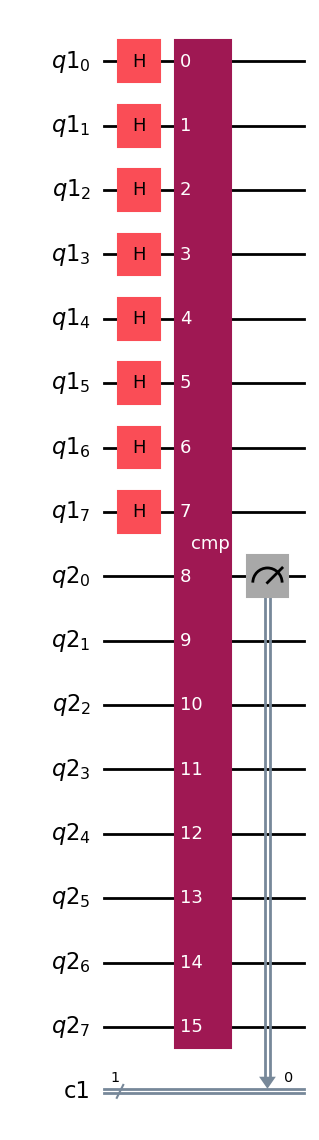

In [11]:
from qiskit import QuantumCircuit, transpile, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import IntegerComparator
from qiskit_aer import AerSimulator

N_COUNT = 8
value_to_compare_to = 15
qr1 = QuantumRegister(N_COUNT, 'q1')
qr2 = QuantumRegister(N_COUNT, 'q2')
cl1 = ClassicalRegister(1, 'c1')

qc = QuantumCircuit(qr1, qr2, cl1)
comparer = IntegerComparator(num_state_qubits=(N_COUNT), value=111, geq=False)
for q in range(N_COUNT):
    qc.h(qr1[q])
qc.append(comparer, range(comparer.num_qubits))
qc.measure(qr2[0], cl1[0])
display(qc.draw('mpl'))

In [12]:
simulator = AerSimulator()

In [13]:
qcircuit = transpile(qc, simulator)

In [14]:
result = simulator.run(qcircuit).result()

Result(backend_name='aer_simulator', backend_version='0.16.4', qobj_id='', job_id='c2e588fe-01fd-479b-9089-8dfdb3e4864f', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x1': 449, '0x0': 575}), header=QobjExperimentHeader(creg_sizes=[['c1', 1]], global_phase=0.0, memory_slots=1, n_qubits=16, name='circuit-222', qreg_sizes=[['q1', 8], ['q2', 8]], metadata={}), status=DONE, seed_simulator=2297280925, metadata={'num_bind_params': 1, 'runtime_parameter_bind': False, 'parallel_state_update': 10, 'parallel_shots': 1, 'sample_measure_time': 0.001539333, 'noise': 'ideal', 'batched_shots_optimization': False, 'remapped_qubits': False, 'active_input_qubits': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], 'device': 'CPU', 'time_taken': 0.017623875, 'measure_sampling': True, 'num_clbits': 1, 'max_memory_mb': 65536, 'input_qubit_map': [[15, 15], [14, 14], [13, 13], [12, 12], [11, 11], [10, 10], [9, 9], [8, 8], [7, 7], [6, 

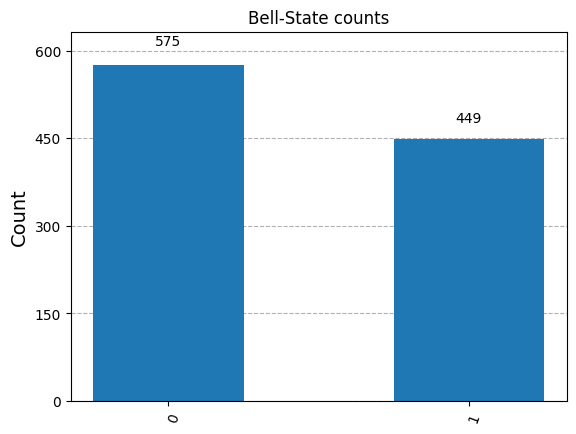

In [15]:
print(result)
print('ancillary qubits', comparer.ancillas)
print('untranspiled qc results')
print('gates used: ', dict(qc.count_ops()))
print('total # of gates used: ', sum(dict(qc.count_ops()).values()))
print('number of qubits: ', qc.num_qubits)
print ('transpiled qcircuit results')
print('gates used: ', dict(qcircuit.count_ops()))
print('total # of gates used: ', sum(dict(qcircuit.count_ops()).values()))
print('number of qubits: ', qcircuit.num_qubits)
counts = result.get_counts(qcircuit)
plot_histogram(counts, title='Bell-State counts')